### Computer vision libraries in PyTorch

* [torchvision](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch compyter vision
* `torchvision.datasets` - get datasets and dataloading functins for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - function for manipulating vision data (images)
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2+cu118


### Getting a dataset 

The dataset we'll be using is FashionMNIST from torchvision.datasets -
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(root = "data", # where to download data to?
                                  train = True, # do we want the training dataset?
                                  download = True, # do we want to download?
                                  transform = torchvision.transforms.ToTensor(), # how do we want to transform the data?
                                  target_transform = None # how do we want to transform the labels/targets?
                                  )

test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor(),
                                  target_transform = None
                                 )

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
images = []
labels = []
for image,label in train_data:
    images.append(image)
    labels.append(label)

In [5]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualizing image

Text(0.5, 1.0, '5')

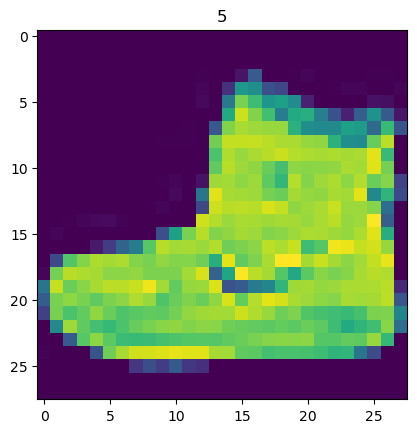

In [7]:
plt.imshow(images[0].squeeze())
plt.title(label)

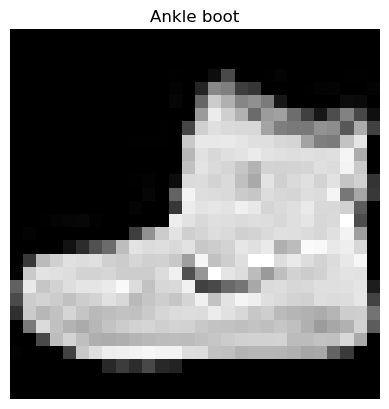

In [8]:
plt.imshow(images[0].squeeze(), cmap = "gray")
plt.title(class_name[labels[0]])
plt.axis(False);

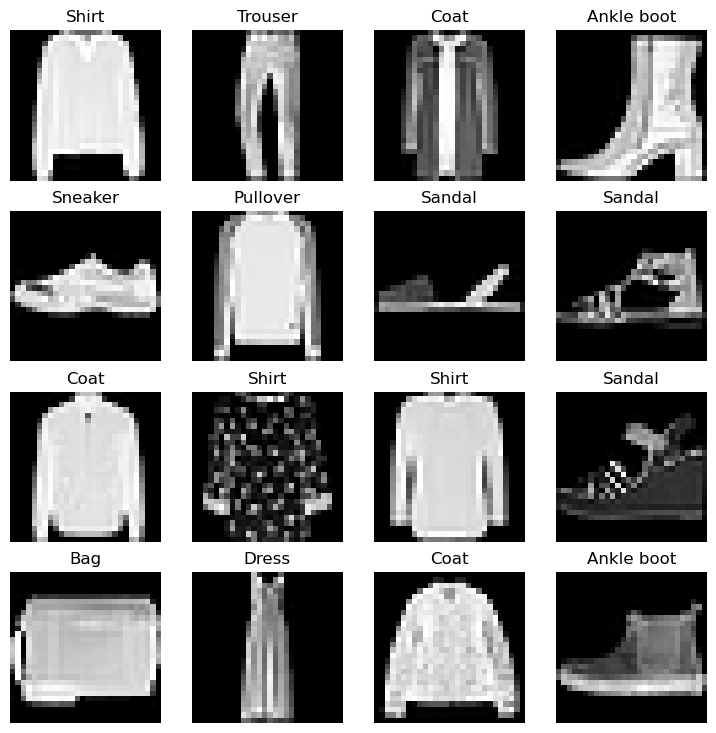

In [9]:
## Plot more images

# torch.manual_seed(42)

fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_index = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_name[label])
    plt.axis(False);

## Preparing DataLoader

Right now, we have our data in the form of PyTorch Datasets
**DataLoader** turns our dataset into a Python iterable

we want to divide our data into batches when training for efficient computing(in low memory) and avoid 60000 images in one hit.
**Batches** means the amount of image (32 images = 32 batch size)

It gives neural network more chances to update its gradients per epoch.

In [10]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x22abe2a2bd0>,
 <torch.utils.data.dataloader.DataLoader at 0x22ac03615d0>)

In [11]:
print(f"DataLoaders ; {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} Batches of {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} Batches of {BATCH_SIZE}")

DataLoaders ; (<torch.utils.data.dataloader.DataLoader object at 0x0000022ABE2A2BD0>, <torch.utils.data.dataloader.DataLoader object at 0x0000022AC03615D0>)
Length of train dataloader : 1875 Batches of 32
Length of test dataloader : 313 Batches of 32


In [12]:
# Checking out what's insider the training dataloader
train_features_batch, train_labels_batch =  next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 7, label size : torch.Size([])


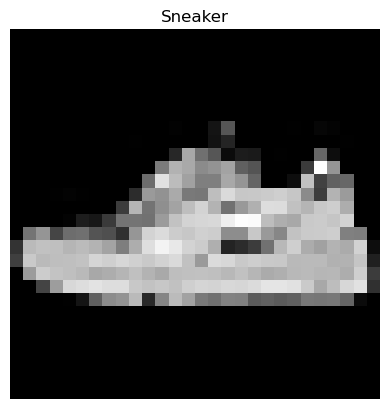

In [13]:
# torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")


## Modeling

Best is if we start with a baseline model and add complexity as required.

If something can be done in a simple way, it should be done in simple way

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [15]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Getting a simple sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [16]:
#Example

# Flatten the sample
output = flatten_model(x)

output.shape

# As seen, nn.Flatten() takes the data with multidimension and combines it all into a vector space(flat data).
# Example - Tesla's 8 cameras record all of the data around the surrounding and flattens it into 3d vector space that allows 360 view in the screen

torch.Size([1, 784])

In [17]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
        0.0000, 0.4471, 0.6431, 0.3216, 0.0000, 0.0000, 0.0000, 0.5804, 0.4863,
        0.1373, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0235,
        0.0000, 0.2863, 0.9882, 0.9490, 0.9961, 0.0000, 0.0000, 0.4157, 0.9216,
        0.8471, 0.8000, 0.0157, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0235, 0.0000, 0.1922, 0.9373, 0.8392, 0.9490, 0.5176, 0.0000, 1.0000,
        0.8510, 0.8353, 0.7843, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0235, 0.0000, 0.2196, 0.9569, 0.8706, 0.8863, 0.9098, 0.8000,
        0.9804, 0.8549, 0.8431, 0.7882, 0.0118, 0.0000, 0.0118, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

## Only linear layers with nn.flatten()

In [18]:
from torch import nn

class FashionMNISTModelv1(nn.Module):
    def __init__(self,
                input_shape : int,
                hidden_units : int,
                output_shape : int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                     out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                     out_features = output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model0 = FashionMNISTModelv1(
    input_shape = 784, # input shape is [1, 28, 28]. Flatten is used so the input shape becomes 784. 28*28*1 can be used as well
    hidden_units = 10,
    output_shape = len(class_name)
)

model0.to(device)

FashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 28, 28])
model0(dummy_x.to(device))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setting Loss, Optimizer and evaluation metrics

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = request.get("https://raw.githubusercontent.com/aayush2058/python_files/master/helper_functions.py")
    with open("helper_functions.py", 'wb') as file:
        f.write(request.content)
        

helper_functions.py already exists, skipping download...


In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model0.parameters(),
                           lr = 0.01)

In [24]:
from timeit import default_timer as timer 
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
    """
    Prints difference between start and end time
    """
    total_time = end - start
    print(f"Train time on {device} : {total_time : .3f} seconds")
    return total_time
    

In [25]:
start_time = timer()
#some code...
end_time = timer()
print_train_time(start = start_time, end = end_time, device = 'cpu')

Train time on cpu :  0.000 seconds


2.2799998987466097e-05

### Loops
1. Loop through the epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all (for fun)

In [26]:
# Import tqdm for prograss bar
from tqdm.notebook import tqdm
# from tqdm.auto import tqdm

# Setting timer and seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keeping it small at the beginning)
epochs = 3

# Creating training and testing loops
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n-----------")
    
    ## Training
    train_loss = 0
    # Add a loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        
        model0.train()

        # forward pass
        train_preds = model0(X)  

        #Calculate loss (per batch)
        loss = loss_fn(train_preds, y)
        train_loss += loss # accumulates the loss separaterly per loop

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        optimizer.step()

        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)


                
#----------------------------- Testing----------------------------
                  
    test_loss, test_acc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            
            
            # forward pass
            test_preds = model0(X_test)

            # Calculate loss (accumulatively)
            test_loss += loss_fn(test_preds, y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_preds.argmax(dim = 1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        #Calculate the test acc average per batch 
        test_acc /= len(test_dataloader)
    
    # Print what's happening
    print(f"\nTrain loss : {train_loss:.4f} | Test loss : {test_loss: .4f} | Test accuracy : {test_acc}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model0.parameters()).device)
                                           )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----------
Looked at 0/60000 samples.
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Train loss : 0.9096 | Test loss :  0.6290 | Test accuracy : 78.63418530351437
Epoch : 1
-----------
Looked at 0/60000 samples.
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Train loss : 0.5573 | Test loss :  0.5441 | Test accuracy : 81.13019169329074
Epoch : 2
-----------
Looked at 0/60000 samples.
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Train loss : 0.5027 | Test loss :  0.5137 | Test accuracy : 81.9988019169329
Train time on cpu :  26.725 seconds


In [27]:
str(next(model0.parameters()).device)

'cpu'

### Make predictions and get model results

In [28]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
             data_loader : torch.utils.data.DataLoader,
             loss_fn : torch.nn.Module,
             accuracy_fn,
              device = device):
    """
    Returns a dictionary containing the results of model predicting on data loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            # Make predictions
            y_pred = model(X)
            
            # Accuracy the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y,
                              y_pred = y_pred.argmax(dim = 1))
             
        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name" : model.__class__.__name__ , # This only works when model was created with a class
           "model_loss" : loss.item(),
           "model_acc" : acc}



In [29]:
# Calculate model result on test dataset

model0_results = eval_model(model = model0,
                          data_loader = test_dataloader,
                          loss_fn = loss_fn,
                          accuracy_fn = accuracy_fn)

model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.5136752128601074,
 'model_acc': 81.9988019169329}

## Non-linear layers with ReLU() and Flatten()

In [30]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                input_shape : int,
                hidden_units : int,
                output_shape : int):
        super(). __init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                     out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                     out_features =  hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                     out_features = output_shape),
            nn.ReLU()
            )
    def forward(self, x):
            return self.layer_stack(x)
        

In [31]:
X[0].shape

torch.Size([1, 28, 28])

In [32]:
model1 = FashionMNISTModelV2(input_shape = (1*28*28),
                            hidden_units = 10,
                            output_shape = len(class_name))
model1.to(device)

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
  )
)

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(),
                           lr = 0.1)
from helper_functions import accuracy_fn
from tqdm.notebook import tqdm

## Functioning training and evaluation/ testing loops

Let's create a function for:
* training loop - `train_loop()`
* testing loop - `test_loop()`

In [34]:
 def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
    '''
    performs trainig with model trying to learn on a data_loader.
    '''    
    
    ## Training
    train_loss, train_acc = 0, 0
    
    # Put model into training mode 
    model.train()
    
    # Add a loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        
        # forward pass
        train_preds = model(X)  

        #Calculate loss (per batch)
        loss = loss_fn(train_preds, y)
        train_loss += loss # accumulates the loss separaterly per loop
        train_acc += accuracy_fn(y_true = y,
                                y_pred = train_preds.argmax(dim = 1))
        # argmax() is used because raw predictions are logits
        # dim = 1 is used to set where to apply argmax

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        optimizer.step()

        
    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train_loss: {train_loss:.4f} | Train_acc:{train_acc:.2f}")


In [35]:
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
    
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test = X_test.to(device)
            y_test = y_test.to(device)


            # forward pass
            test_preds = model(X_test) 

            # Calculate loss (accumulatively)
            test_loss += loss_fn(test_preds, y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_preds.argmax(dim = 1))

        # Calculate the test loss average per batch
        test_loss /= len(data_loader)

        #Calculate the test acc average per batch 
        test_acc /= len(data_loader)

        # Print what's happening
        print(f"Test loss : {test_loss: .4f} | Test accuracy : {test_acc:.2f}\n")

In [36]:
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
    """
    Prints difference between start and end time
    """
    total_time = end - start
    print(f"Train time on {device} : {total_time : .3f} seconds")
    return total_time

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model = model1,
              data_loader = train_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              optimizer = optimizer,
              device = device)
    test_step(model = model1,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device) # test doesnot need optimizer as we are evaluating not improving
    
train_time_end_on_gpu = timer()
total_train_time_for_model = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train_loss: 0.9413 | Train_acc:65.19
Test loss :  0.5886 | Test accuracy : 79.05

Epoch: 1
------
Train_loss: 0.5082 | Train_acc:81.98
Test loss :  0.5838 | Test accuracy : 79.06

Epoch: 2
------
Train_loss: 0.4603 | Train_acc:83.61
Test loss :  0.5305 | Test accuracy : 82.00

Train time on cpu :  26.456 seconds


## CPU can be faster sometimes

* By default, data is stored in CPU. When GPU is used, data needs to be passed first from CPU which can take time accordingly. But, Processing and computing is faster on GPU

In [38]:
model1_results = eval_model(model = model1,
                           data_loader = test_dataloader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn,
                           device = device)

model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5305227637290955,
 'model_acc': 81.9988019169329}

In [39]:
model0_results

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.5136752128601074,
 'model_acc': 81.9988019169329}

# Convolutional Neural Network

In [40]:
class FashionMNISTV3(nn.Module):
    """
    Model architecture that replicates the TinyVCG
    model from CNN explainer website.
    """
    def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1), # these are the hyperparameters for 2d data
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
         )
        self.classifier = nn.Sequential(
             nn.Flatten(),
             nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
         )
            
    def forward(self, x):
        x = self.conv_block_1(x)
#         print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
#         print(x.shape)
        return x

In [41]:
torch.manual_seed(42)

conv_model = FashionMNISTV3(input_shape = 1, # only one colour channel in our image
                            hidden_units = 5,
                            output_shape = len(class_name))
conv_model.to(device)

FashionMNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=245, out_features=10, bias=True)
  )
)

In [42]:
image.shape

torch.Size([1, 28, 28])

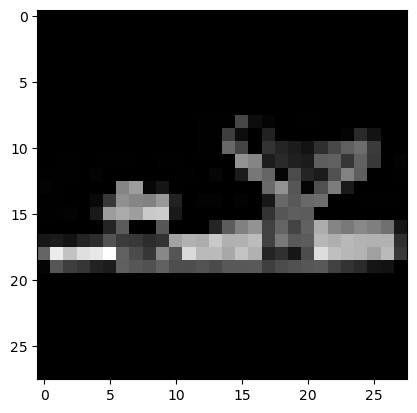

In [43]:
plt.imshow(image.squeeze(), cmap = 'gray')

In [44]:
# Pass image through image
conv_model(image.unsqueeze(0).to(device))


tensor([[-0.0997, -0.0005, -0.0518,  0.1228, -0.0197,  0.0370, -0.0103, -0.1073,
          0.1377, -0.0212]], grad_fn=<AddmmBackward0>)

# Stepping through nn.Conv2d()

In [45]:
torch.manual_seed(42)

#Create a batch of image
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [46]:
# Create a single 2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                     out_channels = 10,
                     kernel_size = 3,
                     stride = 1,
                     padding = 0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [47]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

# Stepping through nn.MaxPool2d()

In [48]:
 test_image.shape

torch.Size([3, 64, 64])

In [49]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and maxpool layer: {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv and maxpool layer: torch.Size([1, 10, 31, 31])


In [50]:
torch.manual_seed(42)

# Create a random tensor with a similar numner of dimensions to out image
random_tensor = torch.randn(size = (1, 1, 2, 2))
random_tensor

# Create a max_pool_layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"original tensor : \n{random_tensor}")
print(f"original tensor shape : {random_tensor.shape}\n")
print(f"max_pool_tensor : {max_pool_tensor}")
print(f"max_pool_tensor shape : {max_pool_tensor.shape}")

original tensor : 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
original tensor shape : torch.Size([1, 1, 2, 2])

max_pool_tensor : tensor([[[[0.3367]]]])
max_pool_tensor shape : torch.Size([1, 1, 1, 1])


## Train Test

In [51]:
# Setup loss function/ eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = conv_model.parameters(),
                           lr = 0.1)


In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_conv_model = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    train_step(model = conv_model,
              data_loader = train_dataloader,
              loss_fn = loss_fn,
              optimizer = optimizer,
              accuracy_fn = accuracy_fn,
              device = device)
    
    test_step(model = conv_model,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device)
    
    train_time_end_conv_model = timer()
    total_train_time_conv_model = print_train_time(start = train_time_start_conv_model,
                                                  end = train_time_end_conv_model,
                                                  device = device)
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train_loss: 0.6465 | Train_acc:76.22
Test loss :  0.4385 | Test accuracy : 83.93

Train time on cpu :  15.399 seconds
Epoch: 1
-------
Train_loss: 0.4024 | Train_acc:85.59
Test loss :  0.3916 | Test accuracy : 85.76

Train time on cpu :  30.878 seconds
Epoch: 2
-------
Train_loss: 0.3665 | Train_acc:86.70
Test loss :  0.3602 | Test accuracy : 86.79

Train time on cpu :  46.077 seconds


In [53]:
# Get conv_model results
conv_model_results = eval_model(model = conv_model,
                                   data_loader = test_dataloader,
                                   loss_fn = loss_fn,
                                   accuracy_fn = accuracy_fn,
                                   device = device)
conv_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.36024197936058044,
 'model_acc': 86.79113418530352}

### Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,
                              model1_results,
                              conv_model_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelv1,0.513675,81.998802
1,FashionMNISTModelV2,0.530523,81.998802
2,FashionMNISTV3,0.360242,86.791134


In [55]:
# Add training time to results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_for_model,
                                    total_train_time_conv_model]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelv1,0.513675,81.998802,26.724598
1,FashionMNISTModelV2,0.530523,81.998802,26.455529
2,FashionMNISTV3,0.360242,86.791134,46.076948


### Visualize our model results


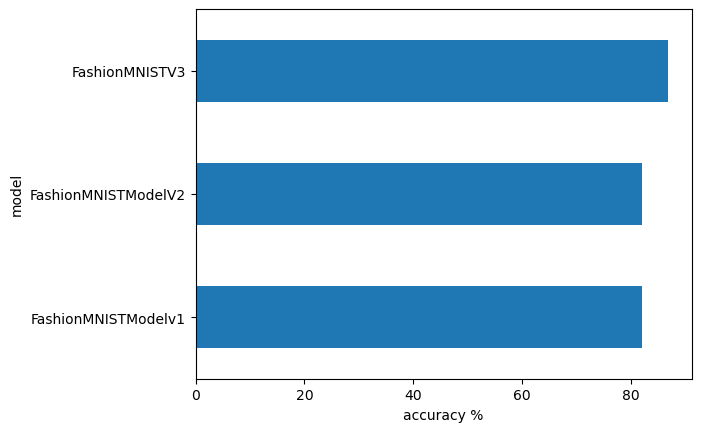

In [56]:
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy %")
plt.ylabel("model");


### Make and evaluate random predictions with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.eval
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample
            sample = torch.unsqueeze(sample, dim = 0).to(device)
            
            # Fordward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [58]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9 ): # k is the number of samples
    test_samples.append(sample)
    test_labels.append(label)
    
# View the first sample shape
test_samples[0].shape 

torch.Size([1, 28, 28])

In [59]:
## Make predictions
pred_probs = make_predictions(model = conv_model,
                             data = test_samples)

# View first two precition probabilities
pred_probs[0:2]

tensor([[3.5578e-04, 1.6764e-05, 3.0122e-02, 6.8358e-05, 9.0144e-01, 7.1131e-06,
         6.7594e-02, 1.1095e-06, 3.4710e-04, 4.4173e-05],
        [9.3382e-02, 2.9201e-02, 2.2396e-02, 5.6487e-01, 2.7105e-01, 5.0003e-05,
         1.7888e-02, 6.5360e-06, 1.1473e-03, 1.0441e-05]])

In [60]:
pred_probs.argmax(dim = 1)

tensor([4, 3, 2, 5, 9, 7, 7, 3, 2])

In [61]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([4, 3, 2, 5, 9, 7, 7, 3, 2])

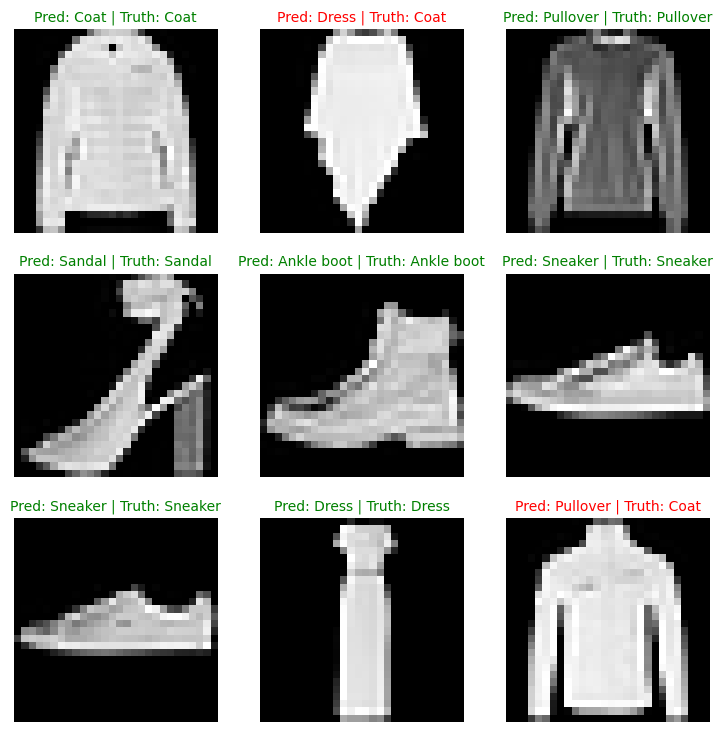

In [62]:
# Plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap = "gray")
    
    # Find the prediction (in test form, eg "Sandal")
    pred_label = class_name[pred_classes[i]]
    
    # Get the truth label (in text form)
    truth_label = class_name[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = "g") # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize = 10, c = "r")
        
    plt.axis(False);

## Confusion matrix
Also, plotting confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [63]:
from tqdm.auto import tqdm
import numpy as np

# Make prediction with trained model
y_preds = []
conv_model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions.."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = conv_model(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# concatenate lost of predictions into a tensor
# print(y_preds) 
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:50]
0

Making predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

0

In [68]:
# See if required packages are installed and if not, install them
try:
    import mlxtend, torchmetrics
    print(f"mixed version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher" 
except:
    !pip install torchmetrics -U mlxtend
    print(f"mlxtend_version: {mlxtend.__version__}")  

mixed version: 0.22.0


tensor([[760,   3,  17,  45,   7,   3, 156,   1,   8,   0],
        [ 11, 858,   2,  88,  20,   1,  17,   0,   3,   0],
        [ 17,   3, 677,  13, 116,   0, 165,   0,   8,   1],
        [ 58,   8,  21, 808,  38,   0,  57,   0,  10,   0],
        [  5,   4, 118,  45, 640,   0, 183,   0,   5,   0],
        [ 10,   4,   2,  10,   0, 812,  14,  55,  86,   7],
        [136,   4,  84,  48,  61,   1, 654,   0,  12,   0],
        [  1,   0,   0,   0,   0,  28,   0, 916,   5,  50],
        [ 32,   2,  15,  24,   8,  10,  48,   8, 852,   1],
        [  3,   0,   0,   1,   1,  25,  16, 140,   9, 805]])


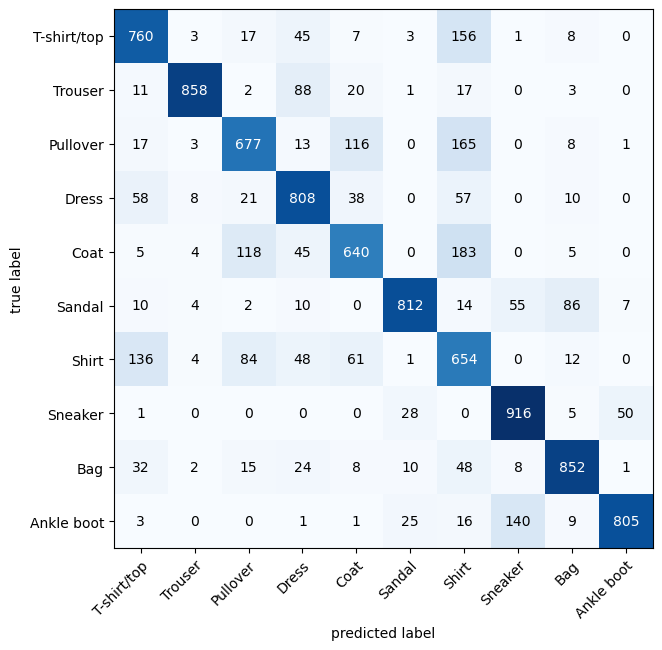

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_name),
                          task = "multiclass"
                          )
confmat_tensor = confmat(preds = y_pred_tensor,
                           target = test_data.targets,
                         )
print(confmat_tensor)

# plotting confusion matrix
fog, ax = plot_confusion_matrix(figsize = (10, 7),
                                conf_mat = confmat_tensor.numpy(), # matplotlib kiles working with numpy
                                class_names = class_name
                               )


## Save and load best performing model

In [87]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, # makes path
                exist_ok = True) # no error if exists

# Create model save
MODEL_NAME = "pytorch_CNN_FASHIONMNIST(dict).pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
                  
MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = conv_model.state_dict(),
          f = MODEL_SAVE_PATH)

Saving model to: models\pytorch_CNN_FASHIONMNIST(dict).pth


In [94]:
# Create a new instance
torch.manual_seed(42)

new_model = FashionMNISTV3(input_shape = 1,
                          hidden_units = 5,
                          output_shape = len(class_name)
                          )

# Load the saved state_dict())
new_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
new_model

FashionMNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=245, out_features=10, bias=True)
  )
)

In [97]:
conv_model_results

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.36024197936058044,
 'model_acc': 86.79113418530352}

In [100]:
## Evaluate loaded model
torch.manual_seed(42)

new_model_results = eval_model(
                        model = new_model,
                        loss_fn = loss_fn,
                        accuracy_fn = accuracy_fn,
                        data_loader = test_dataloader)

  0%|          | 0/313 [00:00<?, ?it/s]

In [102]:
new_model_results

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.36024197936058044,
 'model_acc': 86.79113418530352}

In [103]:
torch.isclose(torch.tensor(conv_model_results["model_loss"]),
             torch.tensor(new_model_results["model_loss"]),
             atol = 1e-02)

tensor(True)